In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import statsmodels.api as sm
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tpo-data-ii/TPO_Database.xlsx


# Introduction

This data set is a collection of golf scores over the past 15 years from an annual golf tournament that has been going on since the 1980s. The event takes place every fall on the Canadian shores of Lake Erie. Family and friends gather at this annual golf tournament coming from all over the country. The golf, perhaps once the reason for the gather, is simply now an excuse for old friends to see each other and discuss all sorts of topics over the course of the weekend. The conversations, beverages, stories and laughs around the fire place, a stones throw away from the cold waters of Lake Erie are fantastic - the golf, not so much. After the tournament concludes on Saturday, the scores get recorded into a "TPO Database" - an excel file created by one of the founding members. Most of the scores are wished to be forgotten by the golfers, but to their dismay, there is now a fantastic database of scores that is ripe for insights.

First, lets read in our dataframes and inspect them using the head method.

In [2]:
raw_tpo_df = pd.read_excel('/kaggle/input/tpo-data-ii/TPO_Database.xlsx', 'Player Data')
hole_info_df = pd.read_excel('/kaggle/input/tpo-data-ii/TPO_Database.xlsx', 'Hole Info')

In [3]:
raw_tpo_df.head()

,Name,Year,Group,Score 1,Putts 1,Score 2,Putts 2,Score 3,Putts 3,Score 4,...,Score 16,Putts 16,Score 17,Putts 17,Score 18,Putts 18,Back 9 Score,Back 9 Putts,Total Score,Total Putts
0,94,2022,2,8.0,2.0,8.0,1.0,4.0,2.0,9.0,...,5.0,2.0,6.0,2.0,7.0,2.0,52.0,17.0,125,38.0
1,Brad M,2022,3,6.0,1.0,7.0,2.0,5.0,2.0,7.0,...,3.0,2.0,4.0,2.0,6.0,1.0,47.0,14.0,101,30.0
2,EBS,2022,2,6.0,2.0,5.0,1.0,3.0,1.0,6.0,...,4.0,2.0,2.0,1.0,4.0,2.0,39.0,14.0,81,29.0
3,Edward J,2022,1,7.0,2.0,8.0,3.0,5.0,2.0,5.0,...,5.0,1.0,4.0,1.0,6.0,3.0,43.0,14.0,95,31.0
4,Hurrican Lu,2022,3,5.0,2.0,6.0,2.0,5.0,2.0,7.0,...,3.0,1.0,5.0,2.0,6.0,1.0,49.0,17.0,101,36.0


In [4]:
hole_info_df

,Hole Number,Par,Yardage
0,1,4,305
1,2,4,325
2,3,3,152
3,4,5,437
4,5,3,200
5,6,4,329
6,7,4,310
7,8,4,315
8,9,3,162
9,10,4,369


The hole number makes sense to be the index for the "Hole Info" Dataframe. Let's change that.

In [5]:
hole_info_df=hole_info_df.set_index('Hole Number')

In [6]:
hole_info_df.head()

,Par,Yardage
Hole Number,,
1,4,305
2,4,325
3,3,152
4,5,437
5,3,200


# Raw TPO Dataframe

We see above that the columns in this dataframe have spaces in them. Let's replace them with underscores.

In [7]:
raw_tpo_df.columns = raw_tpo_df.columns.str.replace(" ", "_")

In [8]:
raw_tpo_df.head()

,Name,Year,Group,Score_1,Putts_1,Score_2,Putts_2,Score_3,Putts_3,Score_4,...,Score_16,Putts_16,Score_17,Putts_17,Score_18,Putts_18,Back_9_Score,Back_9_Putts,Total_Score,Total_Putts
0,94,2022,2,8.0,2.0,8.0,1.0,4.0,2.0,9.0,...,5.0,2.0,6.0,2.0,7.0,2.0,52.0,17.0,125,38.0
1,Brad M,2022,3,6.0,1.0,7.0,2.0,5.0,2.0,7.0,...,3.0,2.0,4.0,2.0,6.0,1.0,47.0,14.0,101,30.0
2,EBS,2022,2,6.0,2.0,5.0,1.0,3.0,1.0,6.0,...,4.0,2.0,2.0,1.0,4.0,2.0,39.0,14.0,81,29.0
3,Edward J,2022,1,7.0,2.0,8.0,3.0,5.0,2.0,5.0,...,5.0,1.0,4.0,1.0,6.0,3.0,43.0,14.0,95,31.0
4,Hurrican Lu,2022,3,5.0,2.0,6.0,2.0,5.0,2.0,7.0,...,3.0,1.0,5.0,2.0,6.0,1.0,49.0,17.0,101,36.0


Now let's get a sense of the data types in this dataframe.

In [9]:
raw_tpo_df.dtypes

Name              object
Year               int64
Group              int64
Score_1          float64
Putts_1          float64
Score_2          float64
Putts_2          float64
Score_3          float64
Putts_3          float64
Score_4          float64
Putts_4          float64
Score_5          float64
Putts_5          float64
Score_6          float64
Putts_6          float64
Score_7          float64
Putts_7          float64
Score_8          float64
Putts_8          float64
Score_9          float64
Putts_9          float64
Front_9_Score      int64
Front_9_Putts      int64
Score_10         float64
Putts_10         float64
Score_11         float64
Putts_11         float64
Score_12         float64
Putts_12         float64
Score_13         float64
Putts_13         float64
Score_14         float64
Putts_14         float64
Score_15         float64
Putts_15         float64
Score_16         float64
Putts_16         float64
Score_17         float64
Putts_17         float64
Score_18         float64


I'd like to inspect the Names column and make sure there are no issues with duplicates, spelling etc.

In [10]:
print(raw_tpo_df['Name'].unique())

[94 'Brad M' 'EBS' 'Edward J' 'Hurrican Lu' 'James B' 'Jim C' 'JWS' 'Re'
 'Sir Ian' 'Zimmy' 'General' 'GWS' 'Jeremy D' 'Jimmy R' 'John B' 'Marc C'
 'Matty G' 'Pedro' 'Pinball' 'Wild Bill' 'Young Dave' 'BCS' 'Kevo' 'Kevy'
 'Mark K' 'Sam' 'Scott M' 'White Rat' 'Jimmy C' 'Carmen' 'Jeremy Max'
 'Tommy S' 'Terry W' 'Pedro II' 'Kent M' '94 II' '94 III' 'Jim Paw'
 'Chris K' 'Mark C' 'Dave K' 'Mike C' 'Russ Kee' 'Duane S' 'Mike W' 'Leo']


Appears we have some duplicate names, "Pedro, Pedro II", "94, 94 II, 94 III" are all one person.

There is also a typo - "Hurrican Lu" should be "Hurricane Lu".

Lastly, there is a data type issue - 94 should be a string as it is a nickname.

Let's make sure all names are strings.

In [11]:
raw_tpo_df['Name']=[str(name) for name in raw_tpo_df['Name']]

Lets see how many names we start with. 47

In [12]:
raw_tpo_df['Name'].nunique()

47

Here we are changing a typo and replacing the naming issues we saw above.

In [13]:
raw_tpo_df['Name'] = raw_tpo_df['Name'].replace(['Hurrican Lu'], 'Hurricane Lu')
raw_tpo_df['Name'] = raw_tpo_df['Name'].replace(['Pedro II'], 'Pedro')
raw_tpo_df['Name'] = raw_tpo_df['Name'].replace(['94 II'], '94')
raw_tpo_df['Name'] = raw_tpo_df['Name'].replace(['94 III'], '94')

We are now down to 44 unique names.

In [14]:
raw_tpo_df['Name'].nunique()

44

# Checking For Nulls and 0s

* Now lets inspect that dataframe for nulls and 0s where they shouldnt be.

In [15]:
raw_tpo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           416 non-null    object 
 1   Year           416 non-null    int64  
 2   Group          416 non-null    int64  
 3   Score_1        412 non-null    float64
 4   Putts_1        411 non-null    float64
 5   Score_2        412 non-null    float64
 6   Putts_2        412 non-null    float64
 7   Score_3        412 non-null    float64
 8   Putts_3        412 non-null    float64
 9   Score_4        412 non-null    float64
 10  Putts_4        412 non-null    float64
 11  Score_5        413 non-null    float64
 12  Putts_5        413 non-null    float64
 13  Score_6        412 non-null    float64
 14  Putts_6        412 non-null    float64
 15  Score_7        412 non-null    float64
 16  Putts_7        412 non-null    float64
 17  Score_8        412 non-null    float64
 18  Putts_8   

We see we have nulls for some of our numerical columns scores and putts.
* Let us go ahead and insert the average score / putt for each hole that has a null.
* Below we see what the average score was, and we insert that score into the column if there was an NA value.


In [16]:
for column in raw_tpo_df.columns[3:]:
    average_score = round(raw_tpo_df[f'{column}'].mean())
    print(f"Average for {column} was: {average_score}")
    raw_tpo_df[f'{column}'] = raw_tpo_df[f'{column}'].fillna(average_score)

Average for Score_1 was: 6
Average for Putts_1 was: 2
Average for Score_2 was: 6
Average for Putts_2 was: 2
Average for Score_3 was: 5
Average for Putts_3 was: 2
Average for Score_4 was: 7
Average for Putts_4 was: 2
Average for Score_5 was: 5
Average for Putts_5 was: 2
Average for Score_6 was: 6
Average for Putts_6 was: 2
Average for Score_7 was: 6
Average for Putts_7 was: 2
Average for Score_8 was: 6
Average for Putts_8 was: 2
Average for Score_9 was: 5
Average for Putts_9 was: 2
Average for Front_9_Score was: 52
Average for Front_9_Putts was: 18
Average for Score_10 was: 7
Average for Putts_10 was: 2
Average for Score_11 was: 5
Average for Putts_11 was: 2
Average for Score_12 was: 5
Average for Putts_12 was: 2
Average for Score_13 was: 5
Average for Putts_13 was: 2
Average for Score_14 was: 4
Average for Putts_14 was: 2
Average for Score_15 was: 5
Average for Putts_15 was: 2
Average for Score_16 was: 4
Average for Putts_16 was: 2
Average for Score_17 was: 5
Average for Putts_17 was: 

# Making Sure Putts and Scores arent 0

Here we want to ensure that there are no 0s in the Total Score or Total Putts column.

In [17]:
raw_tpo_df[raw_tpo_df['Total_Score']==0]
raw_tpo_df[raw_tpo_df['Total_Putts']==0]

,Name,Year,Group,Score_1,Putts_1,Score_2,Putts_2,Score_3,Putts_3,Score_4,...,Score_16,Putts_16,Score_17,Putts_17,Score_18,Putts_18,Back_9_Score,Back_9_Putts,Total_Score,Total_Putts
27,Sir Ian,2020,5,6.0,2.0,6.0,2.0,5.0,2.0,7.0,...,4.0,2.0,5.0,2.0,6.0,2.0,0.0,0.0,0,0.0
100,Re,2016,4,6.0,2.0,6.0,2.0,5.0,2.0,7.0,...,4.0,2.0,5.0,2.0,6.0,2.0,0.0,0.0,63,0.0


We see we have two - I know this first hand that both of these rows represent withdrawals so I will drop them from our scores database. These scores were likely filled in with average scores so we will drop them from our dataframe entirely. 

In [18]:
raw_tpo_df=raw_tpo_df.drop(27)
raw_tpo_df=raw_tpo_df.drop(100)

We also want to make sure our back 9 putss and front 9 putts columns are adding correctly

In [19]:
raw_tpo_df[raw_tpo_df['Back_9_Putts']==0]
raw_tpo_df[raw_tpo_df['Front_9_Putts']==0]

,Name,Year,Group,Score_1,Putts_1,Score_2,Putts_2,Score_3,Putts_3,Score_4,...,Score_16,Putts_16,Score_17,Putts_17,Score_18,Putts_18,Back_9_Score,Back_9_Putts,Total_Score,Total_Putts
90,Edward J,2016,4,6.0,2.0,6.0,2.0,5.0,2.0,7.0,...,4.0,2.0,3.0,1.0,4.0,2.0,38.0,17.0,84,17.0
101,Sam,2016,4,6.0,2.0,6.0,2.0,5.0,2.0,7.0,...,5.0,2.0,6.0,2.0,7.0,2.0,58.0,20.0,116,20.0


Theres two instances where they arent adding up so lets create a way to add all the putts together then insert the correct column.

First, lets get a dataframe of all the putting scores.

In [20]:
putt_cols = [col for col in raw_tpo_df if col.startswith('Putts')]
putt_cols

['Putts_1',
 'Putts_2',
 'Putts_3',
 'Putts_4',
 'Putts_5',
 'Putts_6',
 'Putts_7',
 'Putts_8',
 'Putts_9',
 'Putts_10',
 'Putts_11',
 'Putts_12',
 'Putts_13',
 'Putts_14',
 'Putts_15',
 'Putts_16',
 'Putts_17',
 'Putts_18']

Here we create a new df called putts_df that shows just the scores that we will loop through to get the average.

We also create two seperate dfs that will store the front 9 putting scores and the back 9 putting scores. We will add a column to these two dataframes that sum the rows in them. 

Lastly, we create a new column called Total Putts that sums all the rows within putts df.

In [21]:
putts_df=raw_tpo_df[putt_cols]

Inspecting putts_df

In [22]:
putts_df.head()

,Putts_1,Putts_2,Putts_3,Putts_4,Putts_5,Putts_6,Putts_7,Putts_8,Putts_9,Putts_10,Putts_11,Putts_12,Putts_13,Putts_14,Putts_15,Putts_16,Putts_17,Putts_18
0,2.0,1.0,2.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,1.0
2,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0
3,2.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0
4,2.0,2.0,2.0,2.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0


In [23]:
#front dataframe of putts
putts_df_front = putts_df.iloc[:,[0,1,2,3,4,5,6,7,8]]
#adding a new column that adds it all together
putts_df_front["Front_9_Putts"] = putts_df_front.apply(np.sum, axis=1)

#back dataframe of putts
putts_df_back = putts_df.iloc[:,[9,10,11,12,13,14,15,16,17]]
#adding a new column that adds it all together
putts_df_back["Back_9_Putts"] = putts_df_back.apply(np.sum, axis=1)

#now creating a total putts column so we can add that to our cleaned tpo dataframe
putts_df['Total_Putts'] = putts_df.apply(np.sum, axis=1)

/tmp/ipykernel_18/4228412292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  putts_df_front["Front_9_Putts"] = putts_df_front.apply(np.sum, axis=1)
/tmp/ipykernel_18/4228412292.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  putts_df_back["Back_9_Putts"] = putts_df_back.apply(np.sum, axis=1)
/tmp/ipykernel_18/4228412292.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

Inspecting Putts DF Again

In [24]:
putts_df.head()

,Putts_1,Putts_2,Putts_3,Putts_4,Putts_5,Putts_6,Putts_7,Putts_8,Putts_9,Putts_10,Putts_11,Putts_12,Putts_13,Putts_14,Putts_15,Putts_16,Putts_17,Putts_18,Total_Putts
0,2.0,1.0,2.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,38.0
1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,1.0,30.0
2,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,29.0
3,2.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,31.0
4,2.0,2.0,2.0,2.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,36.0


Inspecting our two subdataframes as well.

In [25]:
putts_df_front.head()

,Putts_1,Putts_2,Putts_3,Putts_4,Putts_5,Putts_6,Putts_7,Putts_8,Putts_9,Front_9_Putts
0,2.0,1.0,2.0,3.0,2.0,3.0,3.0,3.0,2.0,21.0
1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,16.0
2,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,15.0
3,2.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,17.0
4,2.0,2.0,2.0,2.0,3.0,3.0,1.0,2.0,2.0,19.0


In [26]:
putts_df_back.head()

,Putts_10,Putts_11,Putts_12,Putts_13,Putts_14,Putts_15,Putts_16,Putts_17,Putts_18,Back_9_Putts
0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,17.0
1,2.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,1.0,14.0
2,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,14.0
3,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,14.0
4,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,17.0


Inserting the columns we need back into our main dataframe.

In [27]:
raw_tpo_df["Front_9_Putts"]=putts_df_front["Front_9_Putts"]
raw_tpo_df["Back_9_Putts"]=putts_df_back["Back_9_Putts"]

In [28]:
#No more instances where Putts are blank
raw_tpo_df[raw_tpo_df['Back_9_Putts']==0]
raw_tpo_df[raw_tpo_df['Front_9_Putts']==0]

,Name,Year,Group,Score_1,Putts_1,Score_2,Putts_2,Score_3,Putts_3,Score_4,...,Score_16,Putts_16,Score_17,Putts_17,Score_18,Putts_18,Back_9_Score,Back_9_Putts,Total_Score,Total_Putts


Quick sniff test .. looks good.

In [29]:
raw_tpo_df["Front_9_Putts"]

0      21.0
1      16.0
2      15.0
3      17.0
4      19.0
       ... 
411    19.0
412    18.0
413    17.0
414    18.0
415    17.0
Name: Front_9_Putts, Length: 414, dtype: float64

Quick check for NAs - all good

In [30]:
raw_tpo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 0 to 415
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           414 non-null    object 
 1   Year           414 non-null    int64  
 2   Group          414 non-null    int64  
 3   Score_1        414 non-null    float64
 4   Putts_1        414 non-null    float64
 5   Score_2        414 non-null    float64
 6   Putts_2        414 non-null    float64
 7   Score_3        414 non-null    float64
 8   Putts_3        414 non-null    float64
 9   Score_4        414 non-null    float64
 10  Putts_4        414 non-null    float64
 11  Score_5        414 non-null    float64
 12  Putts_5        414 non-null    float64
 13  Score_6        414 non-null    float64
 14  Putts_6        414 non-null    float64
 15  Score_7        414 non-null    float64
 16  Putts_7        414 non-null    float64
 17  Score_8        414 non-null    float64
 18  Putts_8        

In [31]:
#changing our dataframe name to cleaned_tpo_df
cleaned_tpo_df=raw_tpo_df
cleaned_tpo_df

,Name,Year,Group,Score_1,Putts_1,Score_2,Putts_2,Score_3,Putts_3,Score_4,...,Score_16,Putts_16,Score_17,Putts_17,Score_18,Putts_18,Back_9_Score,Back_9_Putts,Total_Score,Total_Putts
0,94,2022,2,8.0,2.0,8.0,1.0,4.0,2.0,9.0,...,5.0,2.0,6.0,2.0,7.0,2.0,52.0,17.0,125,38.0
1,Brad M,2022,3,6.0,1.0,7.0,2.0,5.0,2.0,7.0,...,3.0,2.0,4.0,2.0,6.0,1.0,47.0,14.0,101,30.0
2,EBS,2022,2,6.0,2.0,5.0,1.0,3.0,1.0,6.0,...,4.0,2.0,2.0,1.0,4.0,2.0,39.0,14.0,81,29.0
3,Edward J,2022,1,7.0,2.0,8.0,3.0,5.0,2.0,5.0,...,5.0,1.0,4.0,1.0,6.0,3.0,43.0,14.0,95,31.0
4,Hurricane Lu,2022,3,5.0,2.0,6.0,2.0,5.0,2.0,7.0,...,3.0,1.0,5.0,2.0,6.0,1.0,49.0,17.0,101,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,JWS,1995,2,4.0,3.0,5.0,2.0,4.0,2.0,6.0,...,4.0,1.0,6.0,2.0,6.0,3.0,46.0,20.0,92,39.0
412,Pedro,1995,2,6.0,2.0,6.0,2.0,4.0,2.0,6.0,...,4.0,2.0,6.0,3.0,6.0,2.0,53.0,17.0,102,35.0
413,Russ Kee,1995,1,8.0,1.0,4.0,2.0,6.0,2.0,9.0,...,5.0,1.0,6.0,1.0,7.0,3.0,53.0,20.0,114,37.0
414,Sir Ian,1995,3,13.0,2.0,7.0,2.0,6.0,2.0,7.0,...,4.0,2.0,6.0,1.0,10.0,1.0,57.0,19.0,133,37.0


# Now that our dataset is clean we can do some analysis and get insights from the dataset.

# Insights

Let's use some statistical analysis techniques to get a better sense of the dataset by completing the tasks below:

1. Create a box plot to generate quartiles for the scoring on each hole.

2. Answer statistcal questions like:
    * What was the average score when looking at average score of holes?
    * What was the maximum and minimum average scores for this course?
    * What is the correlation between hole length and average score? (Prediction: Should be very close to 1.)
    
    
3. How does Scoring change as players get older? Show this graphically.
    
4. How does my putting and "shots over par" (new created column) correlate vs the entire groups putting vs shots over par?

5. Plot each hole and the distributions of the scores on each hole. 

# Insight #1: Box Plot

# Scores Dataframe

Importing the visualization package matplotlib

In [32]:
from matplotlib import pyplot as plt

Let's create a new dataframe called score_cols that will hold all of the score columns in our cleaned dataframe.

In [33]:
score_cols = [col for col in cleaned_tpo_df if col.startswith('Score')]

scores_df=cleaned_tpo_df[score_cols]

scores_df

,Score_1,Score_2,Score_3,Score_4,Score_5,Score_6,Score_7,Score_8,Score_9,Score_10,Score_11,Score_12,Score_13,Score_14,Score_15,Score_16,Score_17,Score_18
0,8.0,8.0,4.0,9.0,7.0,9.0,10.0,10.0,8.0,7.0,4.0,7.0,7.0,3.0,6.0,5.0,6.0,7.0
1,6.0,7.0,5.0,7.0,6.0,6.0,6.0,5.0,6.0,8.0,4.0,5.0,6.0,5.0,6.0,3.0,4.0,6.0
2,6.0,5.0,3.0,6.0,6.0,3.0,5.0,4.0,4.0,6.0,3.0,7.0,5.0,4.0,4.0,4.0,2.0,4.0
3,7.0,8.0,5.0,5.0,4.0,4.0,6.0,8.0,5.0,6.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,6.0
4,5.0,6.0,5.0,7.0,7.0,6.0,5.0,6.0,5.0,10.0,5.0,6.0,5.0,4.0,5.0,3.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,4.0,5.0,4.0,6.0,7.0,5.0,5.0,5.0,5.0,4.0,5.0,7.0,4.0,3.0,7.0,4.0,6.0,6.0
412,6.0,6.0,4.0,6.0,5.0,6.0,6.0,6.0,4.0,7.0,8.0,6.0,6.0,4.0,6.0,4.0,6.0,6.0
413,8.0,4.0,6.0,9.0,6.0,8.0,7.0,5.0,8.0,10.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,7.0
414,13.0,7.0,6.0,7.0,5.0,16.0,8.0,8.0,6.0,9.0,7.0,6.0,5.0,5.0,5.0,4.0,6.0,10.0


Now plot the box plot we need to get the quartiles of scores.

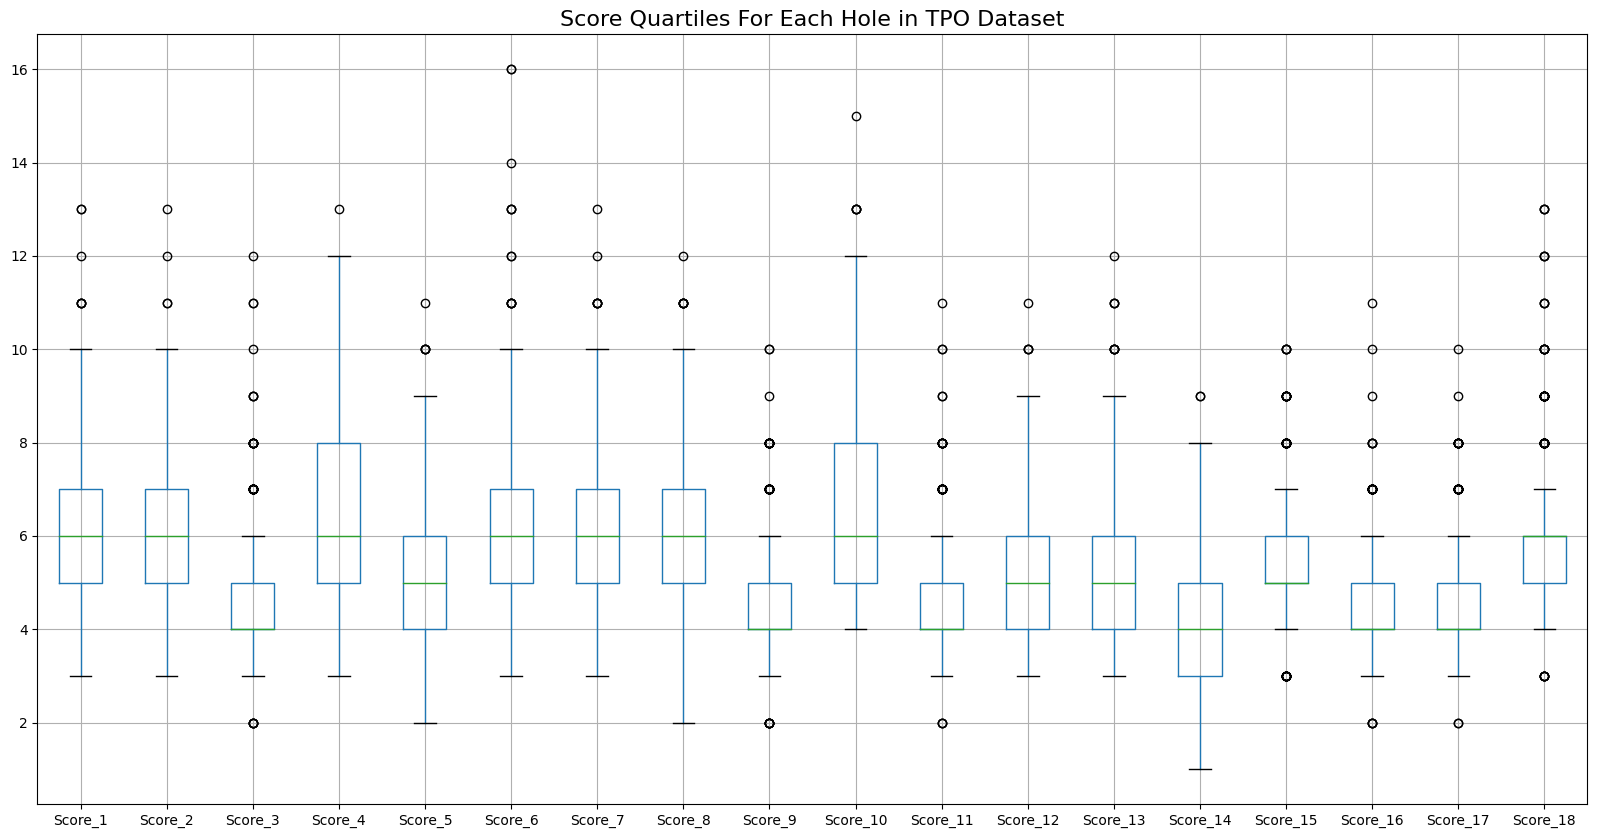

In [34]:
plt.figure(figsize=(20,10))
cleaned_tpo_df[score_cols].boxplot()
plt.title("Score Quartiles For Each Hole in TPO Dataset", fontsize=16)
plt.show()

Above we see a box plot for each hole on the course. The box itself shows us the interquartile range, or the middle 50% of scores. The median score falls within the box, indicating that 50% of the scores were higher than this score and 50% were lower. So for the first hole, 75% of the scores were lower than a 7 - with the highest score being a 13 (which, to no surprise, is being recognized as an outlier!)

We see the easiest hole being number 14, with 25% of golfers making par here, which is 3 shots. We also can tell that for this hole, a hole in one was recorded, because we see the minimum score was a 1! 

The widest boxes occur at holes 4 and 10, which tracks because these are the two longest holes on the course and therefore we are more likely to see higher and more spread out scores. 

Note, I don't want to remove the outliers - every stroke counts and its fun to see how high scores can go on each hole.



# Insight #2 - Statistical Analysis

# Let's examine the Hole Info Dataframe and do some manipulation there.

In [35]:
hole_info_df

,Par,Yardage
Hole Number,,
1,4,305
2,4,325
3,3,152
4,5,437
5,3,200
6,4,329
7,4,310
8,4,315
9,3,162


Let's find out what the par is (the average number of strokes it should take to play) and the total distance of the course.

In [36]:
par_for_course=hole_info_df['Par'].sum()
length_of_course=hole_info_df['Yardage'].sum()

print("The par for the course is:", par_for_course)
print("The length of the course is:",length_of_course, "yards long.")

The par for the course is: 66
The length of the course is: 4605 yards long.


 We see par is 66, lower than a normal course because this course is a lot shorter than the average - only 4600 yards!

Now lets add a new column to our dataframe, "average score" for each hole, and see how distance / par affects it.

In [37]:
average_scores=[]
for col in scores_df:
    avg=round(cleaned_tpo_df[col].mean())
    average_scores.append(avg)

In [38]:
hole_info_df["Average_Score"]=average_scores

In [39]:
hole_info_df

,Par,Yardage,Average_Score
Hole Number,,,
1,4,305,6
2,4,325,6
3,3,152,5
4,5,437,7
5,3,200,5
6,4,329,6
7,4,310,6
8,4,315,6
9,3,162,5


First, lets get some initial statistical numbers about this data frame

In [40]:
hole_info_df.describe()

,Par,Yardage,Average_Score
count,18.000000,18.000000,18.000000
mean,3.666667,255.833333,5.444444
std,0.594089,89.924315,0.855585
min,3.000000,113.000000,4.000000
25%,3.000000,168.750000,5.000000
50%,4.000000,279.000000,5.000000
75%,4.000000,313.750000,6.000000
max,5.000000,437.000000,7.000000


* We see that the average of the average scores is right around 5.5 shots per hole
* The minimum average score for a hole was 4.00, which occurred on the shortest hole on the course
* The maximum average score was a whooping 7, which occurred on the only par 5 on the course, which is also the longest hole.

Correlation between yardage and score:

In [41]:
hole_info_df['Yardage'].corr(hole_info_df['Average_Score'])

0.913137545206855

To be expected there is almost a perfect correlation between how long the hole is and the average score. So we can tell that the shorter holes on this course are pretty standard. We would not expect to see many tricky short holes that would take many shots to finish.

# Insight #3: Aging vs Scoring
For Players with over 22 tournaments played, lets see how their scores have done over the years. Have they improved with time or as aging hindered their scoring?

We will create a new dataframe that groups by the name, then looks and counts the time the name appears. It will return a dataframe of names of players that have been to the tournament 22 times or more.

In [42]:
many_tournaments=cleaned_tpo_df[cleaned_tpo_df.groupby('Name')['Name'].transform('size') > 22]

num_of_players=many_tournaments['Name'].nunique()
unique_years=many_tournaments['Year'].nunique()

print(f"{num_of_players} players have played in 22 tournaments or more over the {unique_years} years of data.")


6 players have played in 22 tournaments or more over the 27 years of data.


Now, we are recreating the many tournaments dataframe to only pull in relevant columns.

In [43]:
many_tournaments=many_tournaments[["Name","Year","Total_Score"]]
many_tournaments

,Name,Year,Total_Score
2,EBS,2022,81
3,Edward J,2022,95
6,Jim C,2022,122
7,JWS,2022,100
9,Sir Ian,2022,153
...,...,...,...
407,Edward J,1995,78
410,Jim C,1995,89
411,JWS,1995,92
414,Sir Ian,1995,133


Let's see what the names are.

In [44]:
many_tournaments["Name"].unique()

array(['EBS', 'Edward J', 'Jim C', 'JWS', 'Sir Ian', 'Wild Bill'],
      dtype=object)

# Graph 1: 6 Most Tenured Golfers

Looking at the 6 most tenured golfers, we will create some individual series that we will combine together to create a dataframe where the names are the columns.

The final result will be a dataframe, where the names are the columns, records are total score, and a "Year" column, that holds the year where all 6 players were there at the tournament together.  

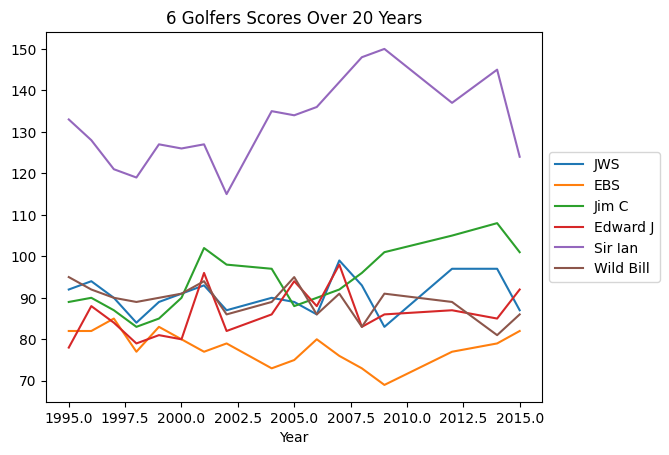

In [45]:
ebs_totals=many_tournaments[many_tournaments['Name']=='EBS']
ed_totals=many_tournaments[many_tournaments['Name']=='Edward J']
jws_totals=many_tournaments[many_tournaments['Name']=='JWS']
jim_totals=many_tournaments[many_tournaments['Name']=='Jim C']
ian_totals=many_tournaments[many_tournaments['Name']=='Sir Ian']
bill_totals=many_tournaments[many_tournaments['Name']=='Wild Bill']

d = {'Year': jws_totals["Year"],'JWS': jws_totals["Total_Score"]}
df1 = pd.DataFrame(data=d)

d2 = {'Year': ebs_totals["Year"],'EBS': ebs_totals["Total_Score"]}
df2 = pd.DataFrame(data=d2)

d3 = {'Year': jim_totals["Year"],'Jim C': jim_totals["Total_Score"]}
df3 = pd.DataFrame(data=d3)

d4 = {'Year': ed_totals["Year"],'Edward J': ed_totals["Total_Score"]}
df4 = pd.DataFrame(data=d4)

d5 = {'Year': ian_totals["Year"],'Sir Ian': ian_totals["Total_Score"]}
df5 = pd.DataFrame(data=d5)

d6 = {'Year': bill_totals["Year"],'Wild Bill': bill_totals["Total_Score"]}
df6 = pd.DataFrame(data=d6)


dfs = [df1, df2,df3,df4,df5,df6]

import functools as ft
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='Year'), dfs)
df_final.plot(x="Year", title="6 Golfers Scores Over 20 Years")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Graph 2 - All Golfers

Lets plot the same graph we did above, but with all of the golfers included and with different visuals.

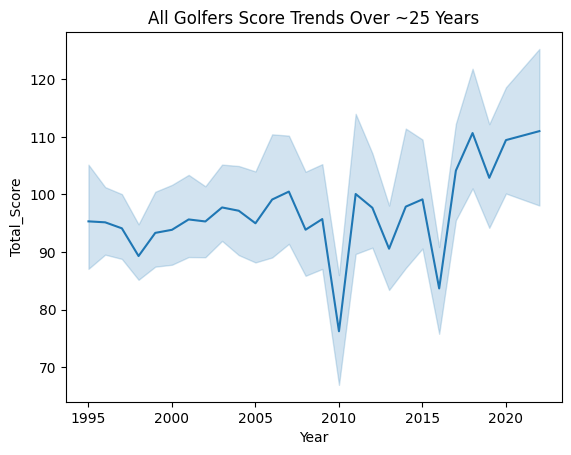

In [46]:
fig, ax = plt.subplots()
sns.lineplot(data=cleaned_tpo_df, x="Year", y="Total_Score", ax=ax).set(title='All Golfers Score Trends Over ~25 Years')
plt.show()

# Takeaways

We see the that the for our 6 golfers, shown in graph 1, who have played in 22 tournaments or more there is a slight trend upwards.

This upward slope gets magnified in graph 2, where we use the entire dataset. Althought there are some valleys, the trend is upwards, especially after the year 2010. 

This could mean that old age is making the players shoot higher scores. It could also point to the fact that many of these players are in there 40s, 50s, and 60s - the prime career years. Perhaps we will see a decline again as more and more golfers are retiring and will be able to play more golf.

# Insight 4: Drive for show or putt for dough?

Many people think that the best golfers are the ones who hit the ball the farthest off the tee. However, those who play the game know that normally, the best golfers are the ones that putt and chip the best. 

I want to see if my putting in a round was correlated with my shots over par.

# Adding Column "Shots_Over_Par"

Now that we know the par for the course lets add in a new column called "Shots_Over_Par" that will tell us how many shots a golfer was from shooting even par.

In [47]:
cleaned_tpo_df["Shots_Over_Par"]=cleaned_tpo_df['Total_Score']-par_for_course
cleaned_tpo_df

,Name,Year,Group,Score_1,Putts_1,Score_2,Putts_2,Score_3,Putts_3,Score_4,...,Putts_16,Score_17,Putts_17,Score_18,Putts_18,Back_9_Score,Back_9_Putts,Total_Score,Total_Putts,Shots_Over_Par
0,94,2022,2,8.0,2.0,8.0,1.0,4.0,2.0,9.0,...,2.0,6.0,2.0,7.0,2.0,52.0,17.0,125,38.0,59
1,Brad M,2022,3,6.0,1.0,7.0,2.0,5.0,2.0,7.0,...,2.0,4.0,2.0,6.0,1.0,47.0,14.0,101,30.0,35
2,EBS,2022,2,6.0,2.0,5.0,1.0,3.0,1.0,6.0,...,2.0,2.0,1.0,4.0,2.0,39.0,14.0,81,29.0,15
3,Edward J,2022,1,7.0,2.0,8.0,3.0,5.0,2.0,5.0,...,1.0,4.0,1.0,6.0,3.0,43.0,14.0,95,31.0,29
4,Hurricane Lu,2022,3,5.0,2.0,6.0,2.0,5.0,2.0,7.0,...,1.0,5.0,2.0,6.0,1.0,49.0,17.0,101,36.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,JWS,1995,2,4.0,3.0,5.0,2.0,4.0,2.0,6.0,...,1.0,6.0,2.0,6.0,3.0,46.0,20.0,92,39.0,26
412,Pedro,1995,2,6.0,2.0,6.0,2.0,4.0,2.0,6.0,...,2.0,6.0,3.0,6.0,2.0,53.0,17.0,102,35.0,36
413,Russ Kee,1995,1,8.0,1.0,4.0,2.0,6.0,2.0,9.0,...,1.0,6.0,1.0,7.0,3.0,53.0,20.0,114,37.0,48
414,Sir Ian,1995,3,13.0,2.0,7.0,2.0,6.0,2.0,7.0,...,2.0,6.0,1.0,10.0,1.0,57.0,19.0,133,37.0,67


Figuring out the tournaments I have participated in.

In [48]:
gws_tpo=cleaned_tpo_df[cleaned_tpo_df['Name']=="GWS"]
gws_tpo

,Name,Year,Group,Score_1,Putts_1,Score_2,Putts_2,Score_3,Putts_3,Score_4,...,Putts_16,Score_17,Putts_17,Score_18,Putts_18,Back_9_Score,Back_9_Putts,Total_Score,Total_Putts,Shots_Over_Par
15,GWS,2020,4,5.0,1.0,5.0,2.0,6.0,2.0,5.0,...,3.0,4.0,1.0,5.0,2.0,43.0,18.0,82,31.0,16
35,GWS,2019,3,5.0,2.0,4.0,1.0,4.0,2.0,5.0,...,1.0,5.0,2.0,4.0,1.0,41.0,16.0,80,31.0,14
54,GWS,2018,4,6.0,2.0,6.0,2.0,5.0,1.0,6.0,...,2.0,3.0,2.0,4.0,1.0,35.0,13.0,81,27.0,15
74,GWS,2017,6,5.0,1.0,4.0,1.0,4.0,1.0,5.0,...,1.0,4.0,2.0,4.0,1.0,40.0,14.0,81,26.0,15
92,GWS,2016,4,6.0,2.0,5.0,2.0,3.0,1.0,5.0,...,2.0,3.0,1.0,5.0,2.0,39.0,14.0,78,28.0,12


Below, shows my putting correlation with lower scores. There really is no correlation at all, this could indicate that my putting game needs improving, or that I play strongly off the tee and fairways, since I am still shooting in the low 80s. It is also a relatively small sample size, so we will get a better sense of this correlation as I play in more tournaments.

In [49]:
gws_tpo['Total_Putts'].corr(gws_tpo['Shots_Over_Par'])

0.12888745877839608

However, when you look at the entire group, better putting does appear to be correlated with shots over par - higher total putts means higher shots over par & lower putts means lower shots over par. 

In [50]:
cleaned_tpo_df["Total_Putts"].corr(cleaned_tpo_df["Shots_Over_Par"])

0.6176402623109184

# Insight 5: Scores Distributions for Each Hole

Let's plot each hole via histogram and look at the shot distribution. We will use our scores df for this.

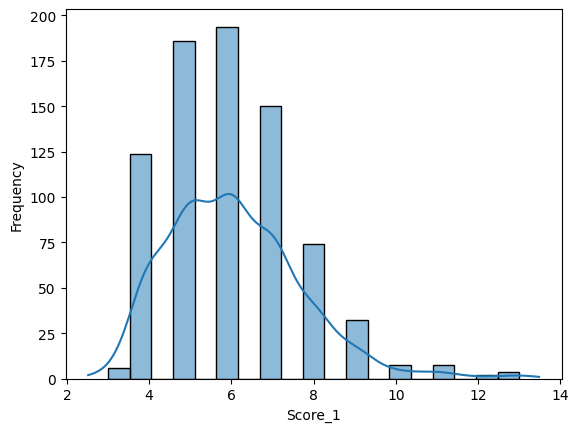

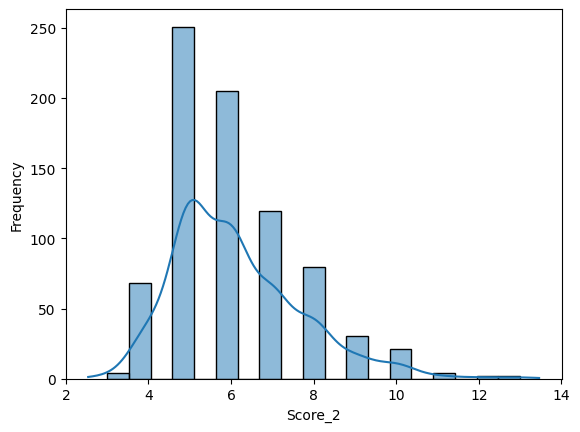

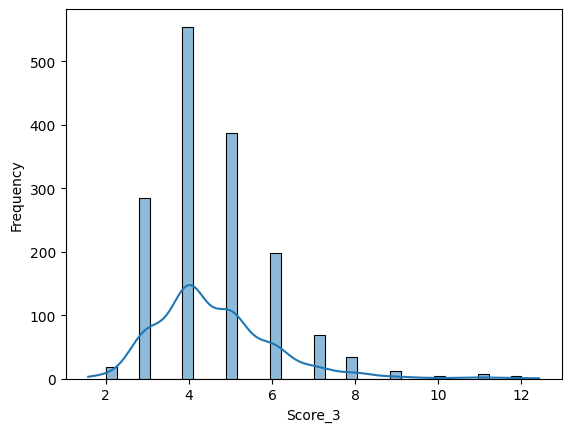

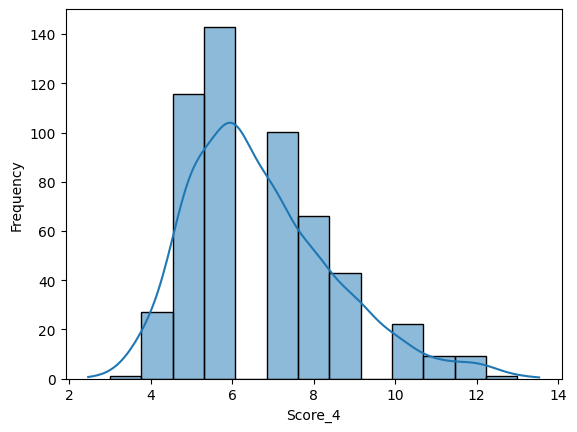

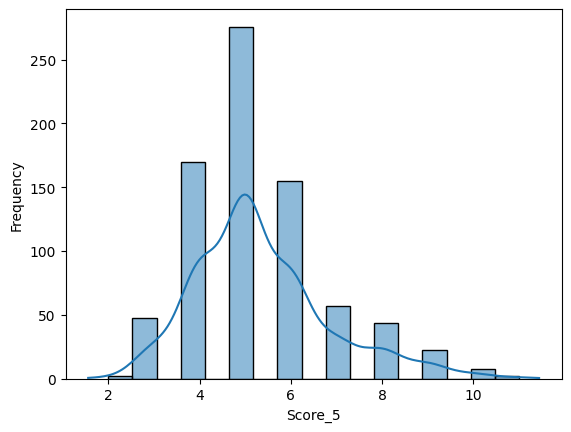

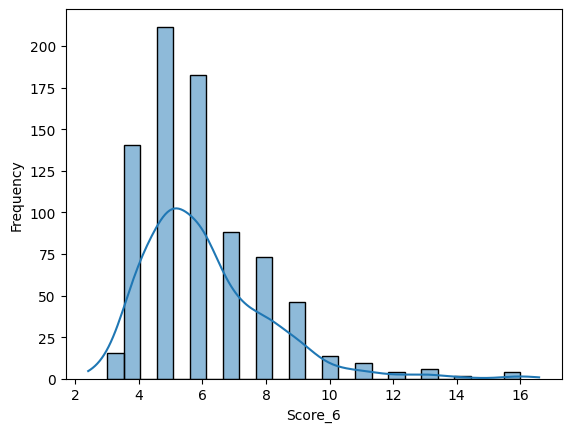

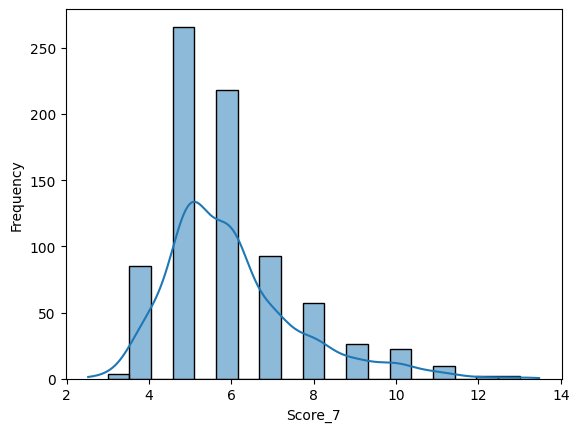

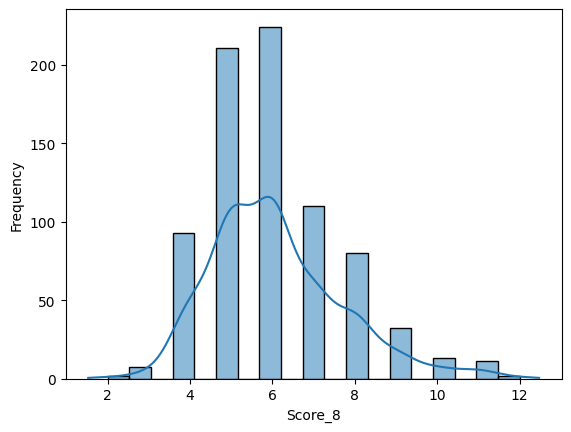

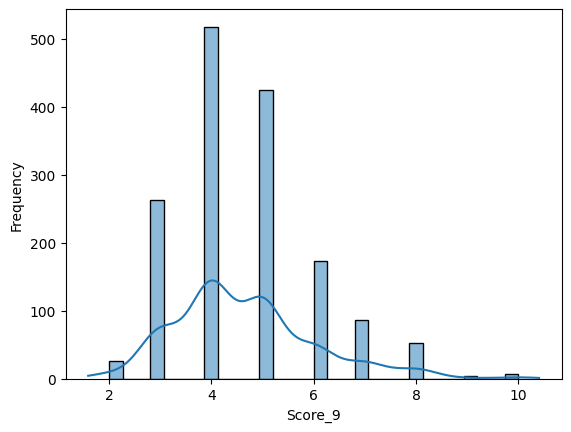

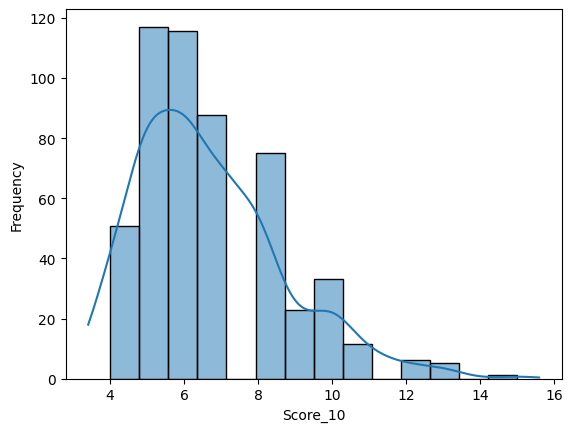

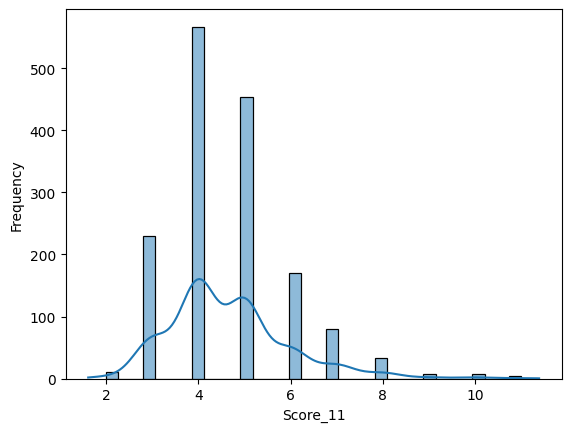

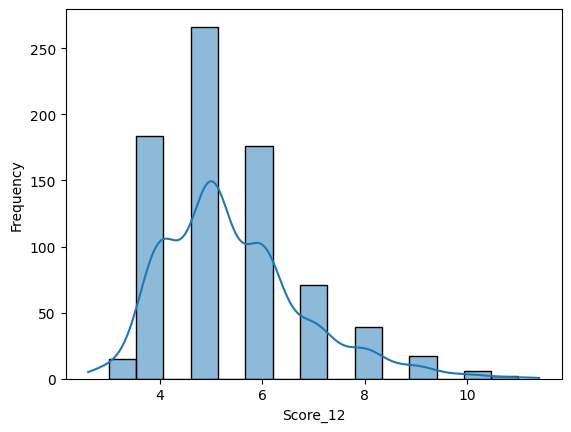

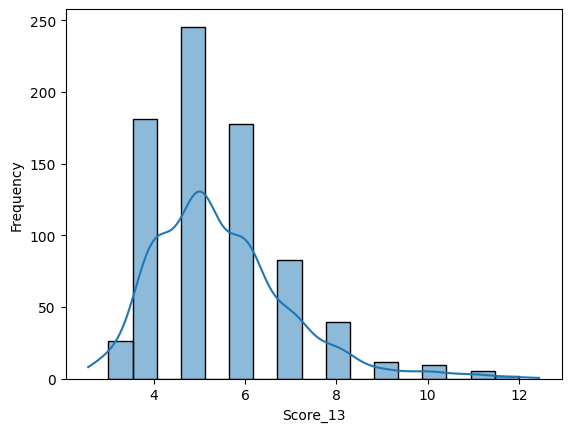

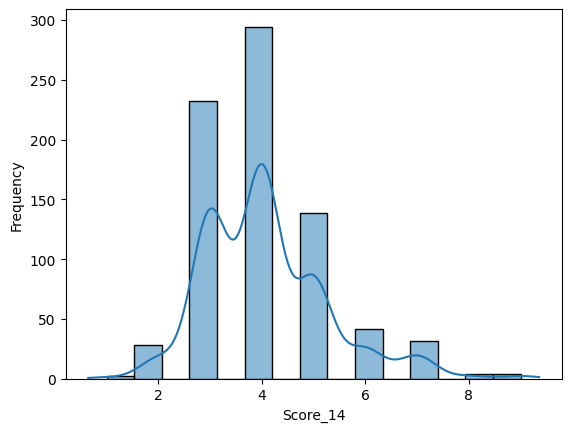

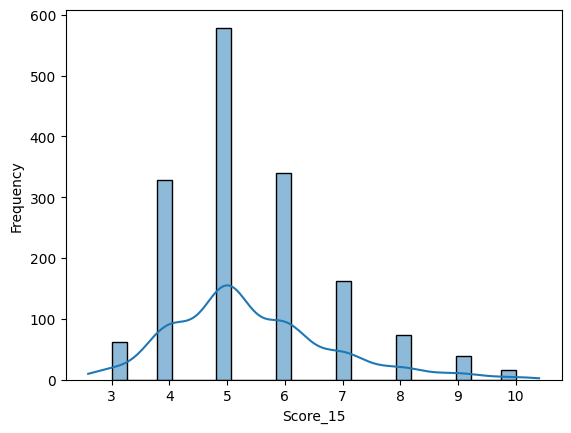

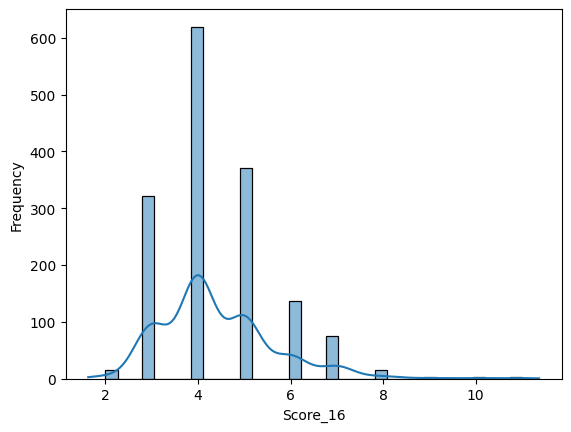

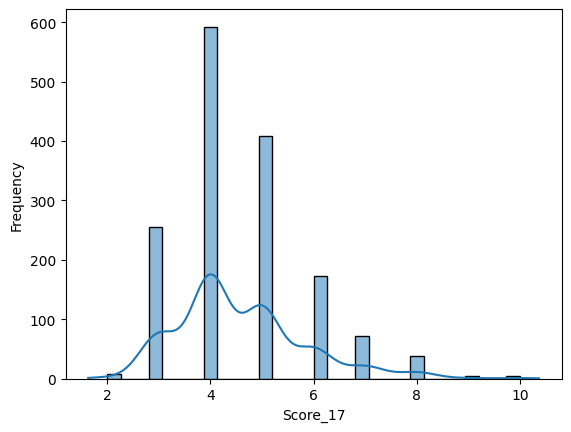

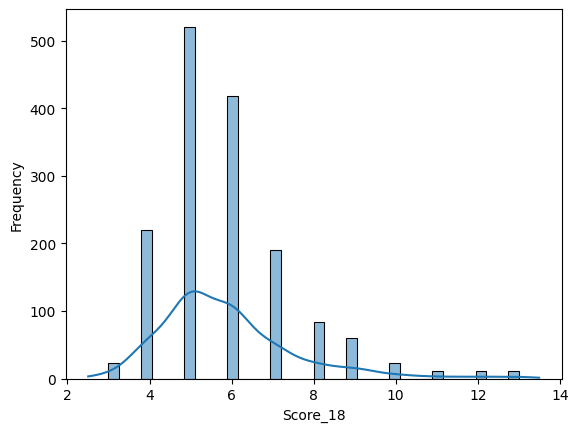

In [51]:
for i, col in enumerate(scores_df.columns):
    plt.figure(i)
    sns.histplot(scores_df[col], stat='frequency', kde=True, kde_kws={"cut": 1})

# Takeaways

It looks like mostly all the holes are right skewed indicating that higher scores were recorded more frequently. There does seem to be one normally distributed hole and that is number 14. A 4 on that hole is the most common followed by a 3, then higher scores after that. This is the shortest hole on the course giving most golfers a fighting chance to do well - so it follows that this the hole that is the most normally distributed. 

# Conclusion

Thank you for reading this analysis of 20 years of amateur golf data. I enjoyed going through this dataset and seeing the trends of this annual tournament I am a part of. It has opened my eyes to the fact that there is so much data out there to be collected, cleaned and analyzed. If a simple score sheet from an annual gathering can yield all of these findings it will be fascinating to find what else can discovered from our lives, no matter how simple.

Than